In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot
import datetime

from matplotlib import pyplot as plt

# data comes from data.gov and United States Census data for Maryland Counties
pop = pd.read_csv("Maryland_Counties_Socioeconomic_Characteristics.csv")
traffic = pd.read_csv("Traffic_Violations_2.csv")

In [3]:
# race columns need combining/scrubbing
race = pop[["White Alone", "Black Alone", "Asian Alone", "American Indian/Alaska Native Alone", "Native Hawaiian/Pacific Islander Alone", "Some Other Race Alone", "Two or More Races", "Hispanic or Latino (of any race)"]]
race.head()

White Alone  Black Alone  Asian Alone  American Indian/Alaska Native Alone  \
0        64164         5899          594                                  120   
1       417111        91567        20818                                 1025   
2       514340       231516        49045                                 2320   
3        73885        10797         1504                                  150   
4        26338         4376          190                                   96   

   Native Hawaiian/Pacific Islander Alone  Some Other Race Alone  \
0                                      24                    210   
1                                     408                  13095   
2                                     398                   8728   
3                                      34                    541   
4                                      18                    721   

   Two or More Races  Hispanic or Latino (of any race)  
0               1580                              1257  
1              20576                             41275  
2              22290                             42438  
3               3913                              3276  
4               1046                              2247

In [4]:
# no other gender column here like the traffic data has. There's only 117 data points listed as "other" so maybe not a big deal
gender = pop[["Male", "Female"]]
gender.head()

Male  Female
0   37892   34699
1  279581  285019
2  392930  435707
3   45184   45640
4   15971   16814

<AxesSubplot:xlabel='index', ylabel='population'>

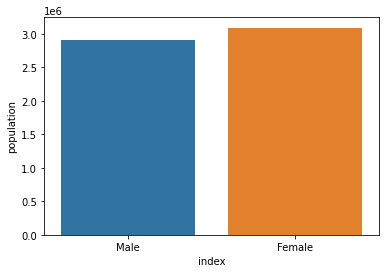

In [20]:
# population of Maryland
gender_sum = gender.sum().reset_index(name="population")
sns.barplot(x="index", y="population", data=gender_sum)

<AxesSubplot:xlabel='Gender', ylabel='count'>

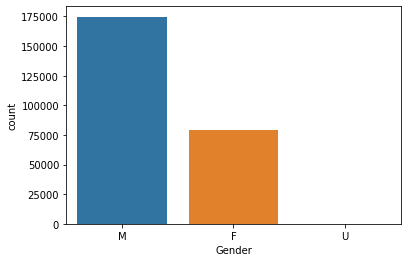

In [26]:
# Maryland traffic violations by gender
gender_traffic = traffic.value_counts(['Gender']).reset_index(name='count')
sns.barplot(x="Gender", y="count", data=gender_traffic)

<AxesSubplot:xlabel='index', ylabel='population'>

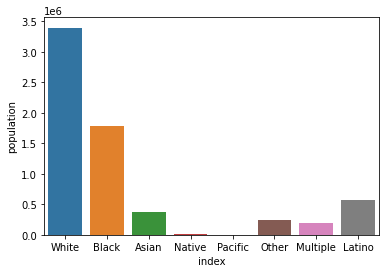

In [39]:
# I bet there's a way better way to rename these columns
# This is the best I could do with what I could find
race.rename(columns={"White Alone":"White"}, inplace=True)
race.rename(columns={"Black Alone":"Black"}, inplace=True)
race.rename(columns={"Asian Alone":"Asian"}, inplace=True)
race.rename(columns={"American Indian/Alaska Native Alone":"Native"}, inplace=True)
race.rename(columns={"Native Hawaiian/Pacific Islander Alone":"Pacific"}, inplace=True)
race.rename(columns={"Some Other Race Alone":"Other"}, inplace=True)
race.rename(columns={"Two or More Races":"Multiple"}, inplace=True)
race.rename(columns={"Hispanic or Latino (of any race)":"Hispanic"}, inplace=True)

#population of Maryand race
demograph = race.sum().reset_index(name="population")
sns.barplot(x="index", y="population", data=demograph)

In [2]:
# traffic violations by race
race_traffic = traffic.value_counts(['Race']).reset_index(name='count')
sns.barplot(x="Race", y="count", data=race_traffic)

NameError: name 'traffic' is not defined

In [11]:
data = pd.read_csv("./data/Traffic_Violations.csv", low_memory=False)
data = data.dropna()
charge = data.value_counts(['Charge']).reset_index(name='count')
top_10_charges = charge.head(10)
top_10_charges = top_10_charges.append(seatbelt)

/Users/tannerchamberlain/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/tannerchamberlain/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


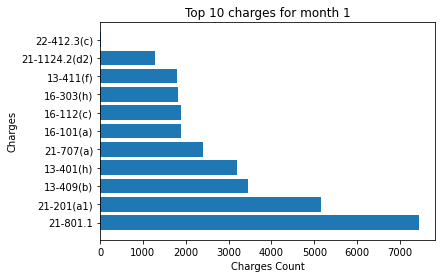

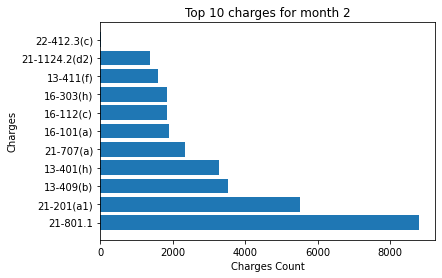

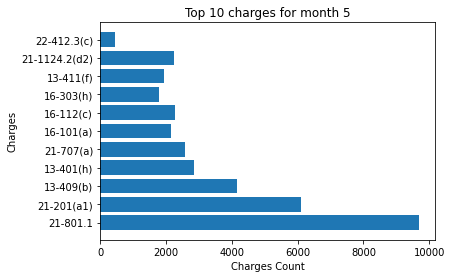

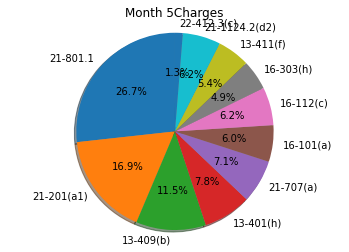

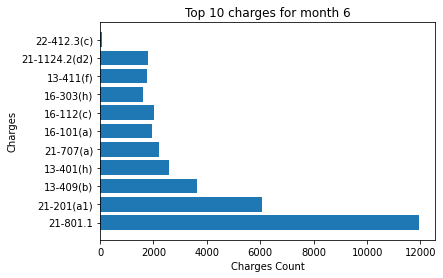

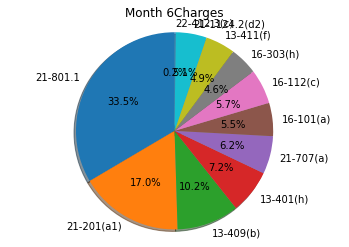

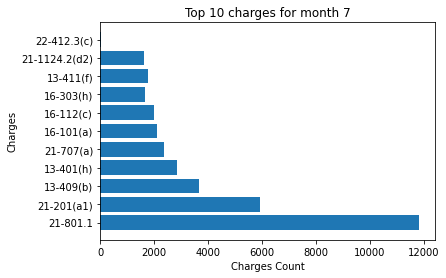

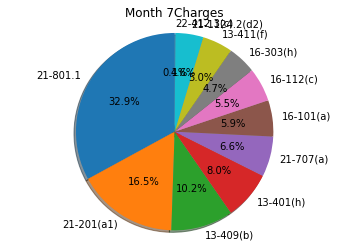

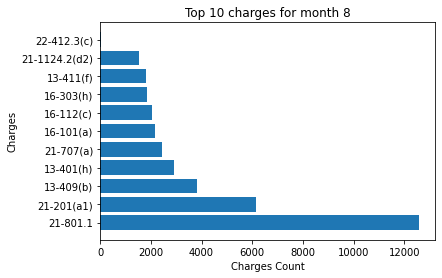

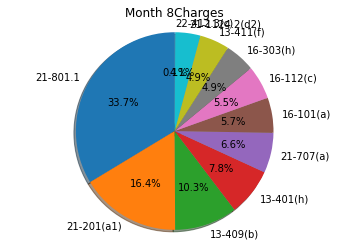

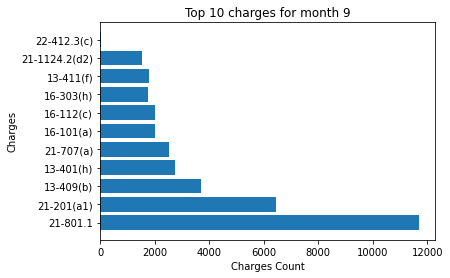

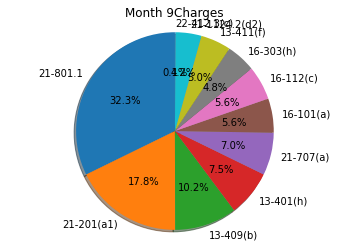

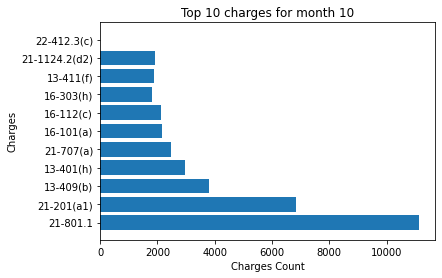

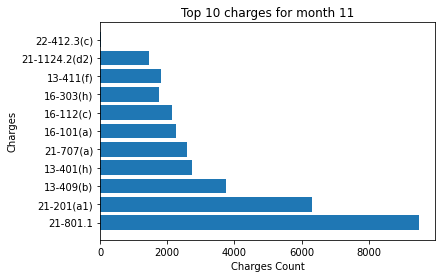

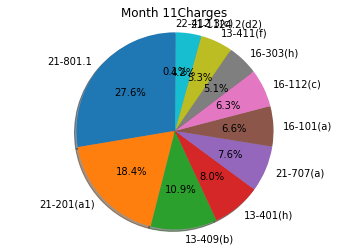

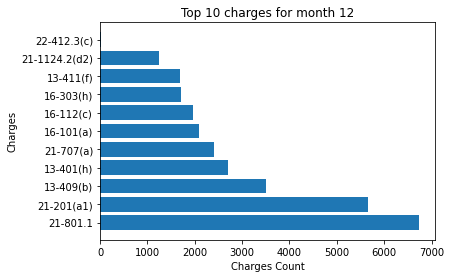

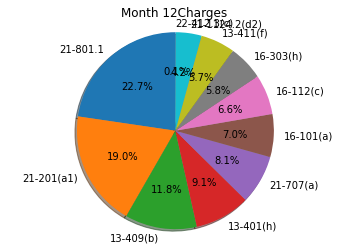

In [12]:
month = data[['Date Of Stop', 'Charge']]
month['Date Of Stop'] = pd.to_datetime(month['Date Of Stop'])
month['Month'] = month['Date Of Stop'].dt.month

all_months_all_charges = []

#for each month:
for i in range(12):
    #this month's charges
    all_charges = {}
#for each of the top 10 charges
    for charge in top_10_charges.Charge:
        #only get this specific charge
        c = month[month['Charge'] == charge]
        #only get the ones that happened in this month (offset between month and i is one)
        month_charge = c[c['Month'] == i + 1]
        #add amount to the charges dataframe for this month
        all_charges[charge] = month_charge.shape[0]
    #append into my all_months list
    all_months_all_charges.append(all_charges)
    #plot this month's charges
    plt.barh(list(all_charges.keys()), all_charges.values())
    plt.xlabel("Charges Count")
    plt.ylabel("Charges")
    plt.title("Top 10 charges for month " + str(i + 1))
    plt.show()
    #plot as a pie chart
    fig1, ax1 = plt.subplots()
    ax1.pie(all_charges.values(), labels=all_charges.keys(), autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title("Month " + str(i+1) + "Charges")
    # show plot
    plt.show()

<AxesSubplot:xlabel='Month', ylabel='value'>

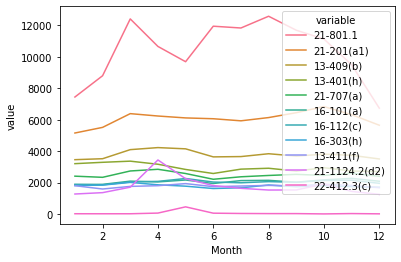

In [13]:
#converting that data into a lineplot
data_prep = pd.DataFrame(all_months_all_charges)
data_prep.insert(0, 'Month', range(1, 13))
data_prep.head()
sns.lineplot(x='Month', y='value', hue='variable', data=pd.melt(data_prep, ['Month']))

In [14]:
#do the exact same thing but for hour of stop
time = data[['Time Of Stop', 'Charge']]
#get hour of stop and convert it into a number
time['Hour'] = time['Time Of Stop'].str[0] + time['Time Of Stop'].str[1]
time['Hour'] = time['Hour'].astype(int)

/Users/tannerchamberlain/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/tannerchamberlain/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


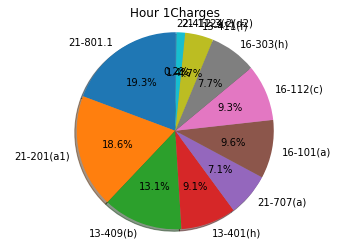

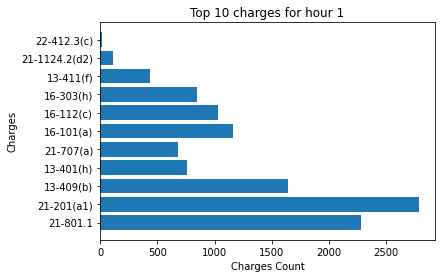

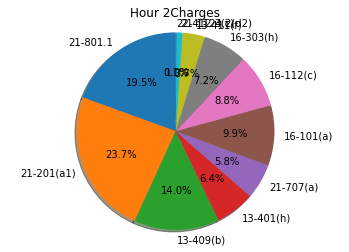

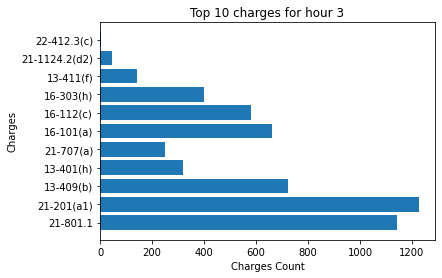

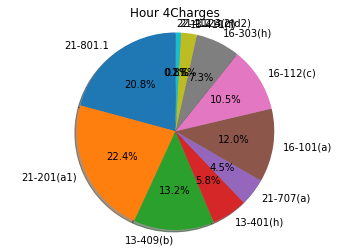

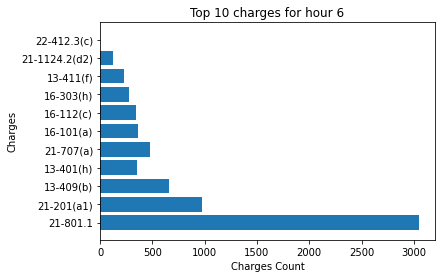

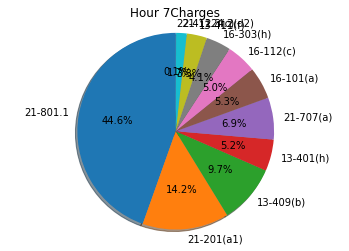

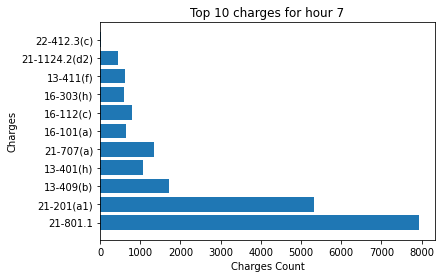

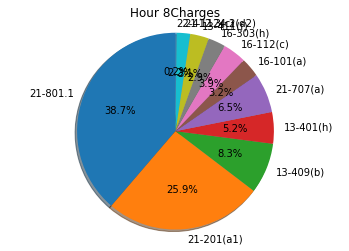

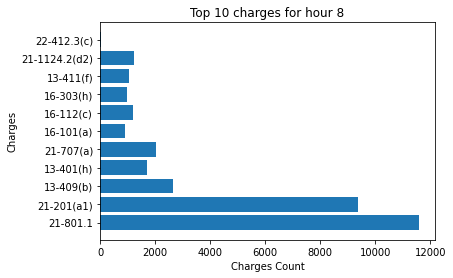

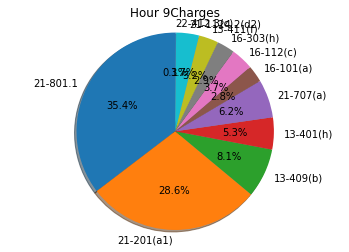

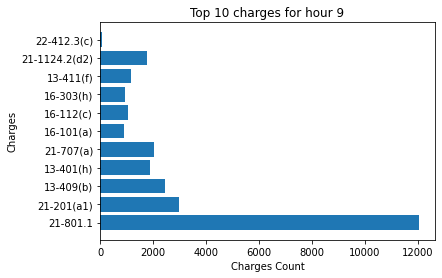

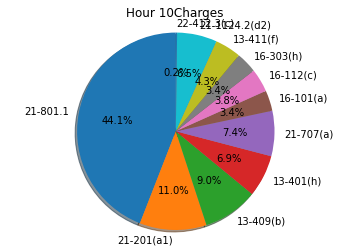

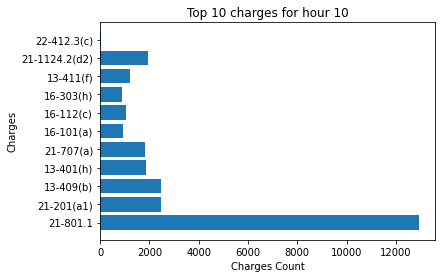

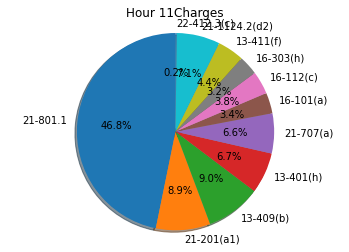

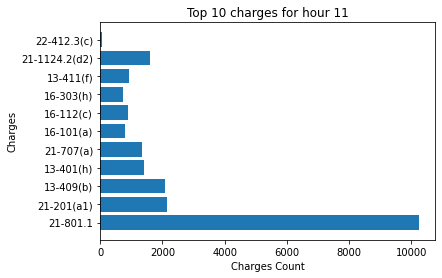

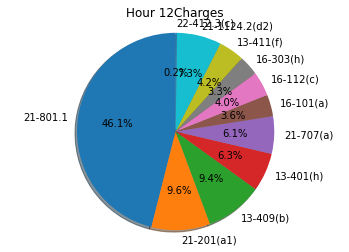

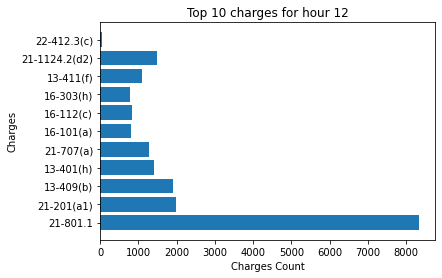

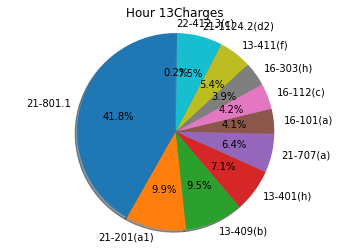

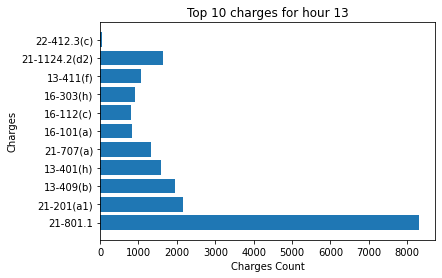

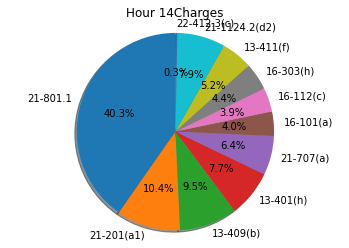

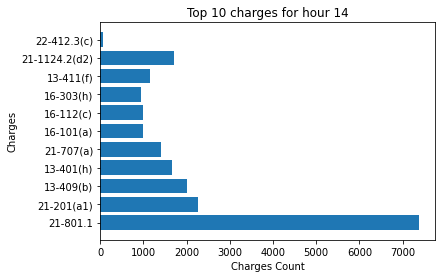

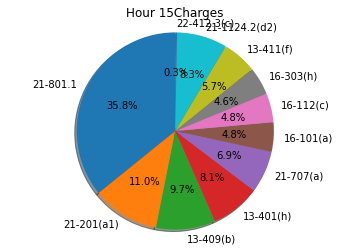

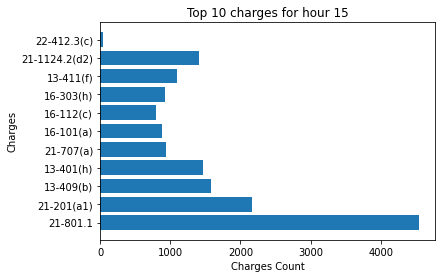

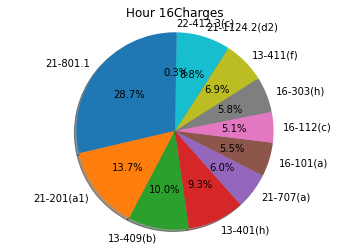

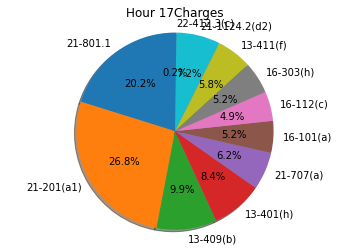

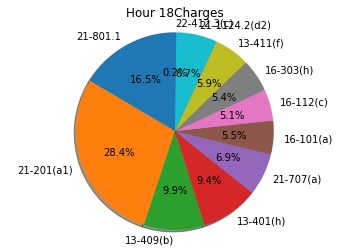

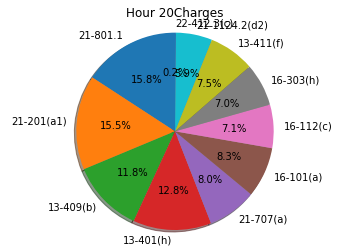

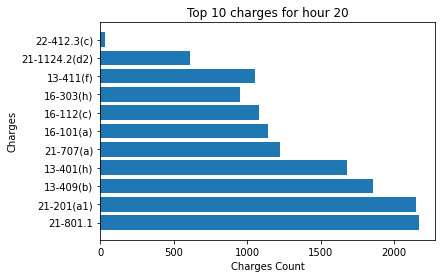

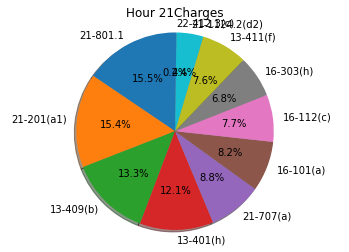

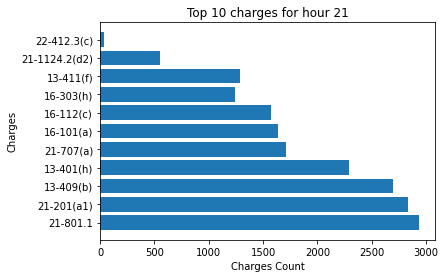

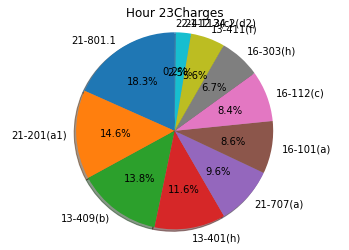

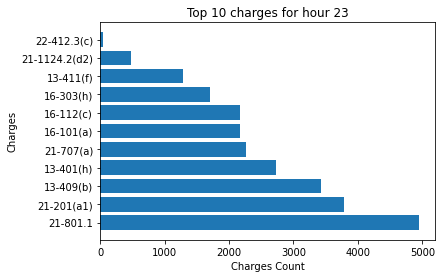

In [16]:
all_hours_all_charges = []

#for each hour:
for i in range(24):
    #this hour's charges
    all_charges = {}
    #for each of the top 10 charges
    for charge in top_10_charges.Charge:
        #only get this specific charge
        c = time[time['Charge'] == charge]
        #only get the ones that happened in this month (no offset this time)
        hour_charge = c[c['Hour'] == i]
        #add amount to the charges dataframe for this month
        all_charges[charge] = hour_charge.shape[0]
    #append into my all_hours list
    all_hours_all_charges.append(all_charges)
    #plot this month's charges
    plt.barh(list(all_charges.keys()), all_charges.values())
    plt.xlabel("Charges Count")
    plt.ylabel("Charges")
    plt.title("Top 10 charges for hour " + str(i))
    plt.show()
    #plot as a pie chart
    fig1, ax1 = plt.subplots()
    ax1.pie(all_charges.values(), labels=all_charges.keys(), autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title("Hour " + str(i+1) + "Charges")
    # show plot
    plt.show()

<AxesSubplot:xlabel='Hour', ylabel='value'>

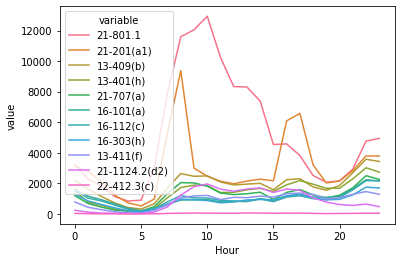

In [17]:
#converting that data into a lineplot
data_prep = pd.DataFrame(all_hours_all_charges)
data_prep.insert(0, 'Hour', range(24))
data_prep.head()
sns.lineplot(x='Hour', y='value', hue='variable', data=pd.melt(data_prep, ['Hour']))

/Users/tannerchamberlain/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/tannerchamberlain/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='Day', ylabel='value'>

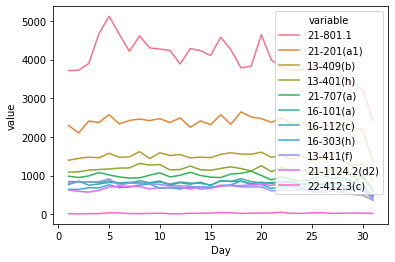

In [18]:
date = data[['Date Of Stop', 'Charge']]
date['Date Of Stop'] = pd.to_datetime(date['Date Of Stop'])
date['Day'] = date['Date Of Stop'].dt.day

all_days_all_charges = []

#for each day:
for i in range(31):
    #this day's charges
    all_charges = {}
#for each of the top 10 charges
    for charge in top_10_charges.Charge:
        #only get this specific charge
        c = date[date['Charge'] == charge]
        #only get the ones that happened in this day (offset between month and i is one)
        date_charge = c[c['Day'] == i + 1]
        #add amount to the charges dataframe for this month
        all_charges[charge] = date_charge.shape[0]
    #append into my all_months list
    all_days_all_charges.append(all_charges)
    # #plot this month's charges
    # plt.barh(list(all_charges.keys()), all_charges.values())
    # plt.xlabel("Charges Count")
    # plt.ylabel("Charges")
    # plt.title("Top 10 charges for month " + str(i + 1))
    # plt.show()
    # #plot as a pie chart
    # fig1, ax1 = plt.subplots()
    # ax1.pie(all_charges.values(), labels=all_charges.keys(), autopct='%1.1f%%',
    #         shadow=True, startangle=90)
    # ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    # plt.title("Month " + str(i+1) + "Charges")
    # # show plot
    # plt.show()
data_prep = pd.DataFrame(all_days_all_charges)
data_prep.insert(0, 'Day', range(1, 32))
data_prep.head()
sns.lineplot(x='Day', y='value', hue='variable', data=pd.melt(data_prep, ['Day']))

In [4]:
# car color
traffic['Color'].head()

0     BLACK
1      BLUE
2       NaN
3    SILVER
4     BLACK
Name: Color, dtype: object

In [10]:
# I moved this chunk to the top of the graph generation code
# data = pd.read_csv("./data/Traffic_Violations.csv", low_memory=False)
# data = data.dropna()
# charge = data.value_counts(['Charge']).reset_index(name='count')
# seatbelt = charge[charge['Charge'] == '22-412.3(c)']
# top_10_charges = charge.head(10)
# top_10_charges = top_10_charges.append(seatbelt)
# top_10_charges

Charge   count
0         21-801.1  124370
1       21-201(a1)   72771
2        13-409(b)   45322
3        13-401(h)   35348
4        21-707(a)   29947
5        16-101(a)   24863
6        16-112(c)   24491
7        16-303(h)   21461
8        13-411(f)   21451
9    21-1124.2(d2)   21175
100    22-412.3(c)     818